# Data 550 Project 2
### Names: Connor Fairbanks, Graham Kerford
### Date: February 13, 2021

### Description of the Data

The 'basketball players stats per season-49 leagues' dataset was used for this project. It comprises player data for 49 leagues from the year 1999 to present for each season. The dataset was downlaoded from [kaggle](https://www.kaggle.com/mirichoi0218/insurance/home) in January, 2020 and is available at: [https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues](https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues). In total ~11 thousand player's data was collected in 49 leagues. Due to the large amount of data available, the dataset used for this project was limited to players who played in more than 60 out of the possible 82 regular season games in only one league (the NBA). We omitted statistics from playoff games for this analysis. If a player played in more than 60 games in a season, it means they had close to a full season and did not miss an inordinate number of games due to injury. The dataset contains the following characteristics for each player:

- `League`: The league that the players played in for the specified season, limited to the NBA for this analysis.

- `Season`: Date of the NBA season (by year).

- `Stage`: The period in the season during which the data was taken.

- `Player`: The name of the player.

- `Team`: The team the player played for during the season.

- `GP`: Games played during the season. 

- `MIN`: Minutes played.

- `FGM`: Field goals made.

- `FGA`: Field goals attempts.

- `3PM`: 3 pointers made.

- `3PA`: 3 point attempts.

- `FTM`: Free throws made.

- `FTA`: Free throws attempts.

- `TOV`: Turnovers

- `PF`: Personal fouls

- `ORB`: Offensive rebounds

- `DRB`: Defensive rebounds

- `REB`: Total rebounds

- `AST`: Assists

- `STL`: Steals

- `BLK`: Blocks

- `PTS`: Points

- `Birth_year`: Year of birth

- `Birth_month`: Month of birth

- `Birth_date`: Birthdate

- `height`: (feet - inches)

- `height`: (cm)

- `weight`: Weight in pounds

- `weight_kg`: Weight in kilograms

- `nationality`: Nationality of the player at birth

- `high_school`: High school attended

- `draft_round`: Draft hound

- `draft_pick`: Draft pick

- `draft_team`: Team drafted to

In [21]:
# Load necessary libraries
library(dplyr) 
library(ggplot2)
library(tibble)
library(tidyverse)
library(plotly)
library(gapminder)
library(GGally)
library(ggrepel)

# Set global theme
my_theme <- theme_bw() +
  theme(
    text = element_text(size = 12),
    panel.border = element_rect(colour = 'grey80'), 
    panel.grid.minor = element_blank(), 
    axis.title.x = element_text(margin = margin(t=10)),
    axis.title.y = element_text(margin = margin(r=10))
  )
theme_set(my_theme)

### Read in the data: 

In [22]:
basketball_df <- read.csv('players_stats_by_season_full_details.csv')

#### Filter the data to a more manageable size as mentioned in the description above: 

In [23]:
names(basketball_df)[1] <- 'League'
NBA_data_filtered <- filter(basketball_df, Stage == 'Regular_Season' & League == 'NBA' & GP >60)

### Exploration of the data and initial thoughts:

First we will look at some summary statistics and the types of data in each column.

In [24]:
summary(NBA_data_filtered)

    League             Season             Stage              Player         
 Length:4245        Length:4245        Length:4245        Length:4245       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     Team                 GP             MIN              FGM       
 Length:4245        Min.   :61.00   Min.   : 266.8   Min.   : 17.0  
 Class :character   1st Qu.:71.00   1st Qu.:1549.7   1st Qu.:198.0  
 Mode  :character   Median :76.00   Median :2029.0   Median :290.0  
                    Mean   :75.08   Mean   :2016.8   Mean   :321.3  
                    3rd Qu.:80.00   3rd


Next we will look at the first few rows of the table to get an idea of what it looks like. 


In [25]:
head(NBA_data_filtered)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,X3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,...,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163,956,1665,0,...,"Mar 6, 1972",7-1,216,325,147,United States,Robert G. Cole High School,1,1,Orlando Magic
2,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126,788,1696,95,...,"Jan 26, 1977",6-6,198,220,100,United States,Mainland High School,1,5,Golden State Warriors
3,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947,752,1476,2,...,"Jul 24, 1963",6-9,206,265,120,United States,Summerfield High School,1,13,Utah Jazz
4,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853,729,1733,89,...,"Jun 7, 1975",6-0,183,165,75,United States,Bethel High School,1,1,Philadelphia Sixers
5,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425,747,1666,177,...,"Jul 23, 1968",6-4,193,180,82,United States,Skyline High School,1,2,Seattle SuperSonics
6,NBA,1999 - 2000,Regular_Season,Jerry Stackhouse,DET,82,3148,619,1447,83,...,"Nov 5, 1974",6-6,198,218,99,United States,Oak Hill Academy,1,3,Philadelphia Sixers



We will perform part of our analysis on the nationality of NBA players, so we will first explore what the unique values are in that column. 


In [26]:
unique(NBA_data_filtered$nationality)

[1] "United States"                                   
 [2] "Germany"                                         
 [3] "Netherlands"                                     
 [4] "Serbia"                                          
 [5] "Democratic Republic of the Congo"                
 [6] "United States / Jamaica"                         
 [7] "Serbia / Greece"                                 
 [8] "United States / Spain"                           
 [9] "Nigeria / England"                               
[10] "Lithuania"                                       
[11] "Ukraine"                                         
[12] "United States / Germany"                         
[13] "Germany / United States"                         
[14] "Canada / Bahamas"                                
[15] "Slovenia"                                        
[16] "Australia"                                       
[17] "Haiti"                                           
[18] "Saint Vincent and the Grenadines / United States"
[19] "Canada / South Africa"                           
[20] "Dominican Republic"                              
[21] "Turkey"                                          
[22] "Canada"                                          
[23] "Finland"                                         
[24] "Spain"                                           
[25] "Russia"                                          
[26] "France"                                          
[27] "Mexico"                                          
[28] "China"                                           
[29] "Croatia"                                         
[30] "Brazil"                                          
[31] "Montenegro"                                      
[32] "Argentina"                                       
[33] "Georgia"                                         
[34] "United States / Norway"                          
[35] "Senegal"                                         
[36] "Puerto Rico / United States"                     
[37] "Czech Republic"                                  
[38] "United States / Qatar"                           
[39] "Canada / Haiti"                                  
[40] "Netherlands / United States"                     
[41] "England / United States"                         
[42] "England / South Sudan"                           
[43] "United States / Dominican Republic"              
[44] "Netherlands / South Sudan"                       
[45] "Latvia"                                          
[46] "Italy"                                           
[47] "United States / Nigeria"                         
[48] "Argentina / Italy"                               
[49] "Switzerland"                                     
[50] "Dominican Republic / United States"              
[51] "England / Nigeria"                               
[52] "United States / Philippines"                     
[53] "France / United States"                          
[54] "Cameroon"                                        
[55] "Poland"                                          
[56] "Israel"                                          
[57] "Sweden"                                          
[58] "United States / Lebanon"                         
[59] "Republic of the Congo / Spain"                   
[60] "Venezuela"                                       
[61] "Switzerland / Turkey"                            
[62] "Switzerland / Montenegro"                        
[63] "United States / Greece"                          
[64] "United States / Puerto Rico"                     
[65] "Italy / United States"                           
[66] "Nigeria"                                         
[67] "Tanzania"                                        
[68] "United States / Australia"                       
[69] "Bosnia and Herzegovina"                          
[70] "Greece / Nigeria"                                
[71] "New Zealand"                                     
[72] "Montenegro / Spain"


We can see that there are many nationalities that state two countries for one player (separated by a backslash). This will be an important aspect to keep in mind when we perform our analysis. We will treat any player that has any country other than "United States" included in their `nationality` as being an "International" player (even if one of their countries listed is the "United States"). 

Next we would like to see the range of heights present in this dataset (in the format of "feet - inches")


In [27]:
sort(unique(NBA_data_filtered$height))

[1] "5-10" "5-11" "5-3"  "5-5"  "5-9"  "6-0"  "6-1"  "6-10" "6-11" "6-2" 
[11] "6-3"  "6-4"  "6-5"  "6-6"  "6-7"  "6-8"  "6-9"  "7-0"  "7-1"  "7-2" 
[21] "7-3"  "7-4"  "7-6"


We can see from the list above that our heights range from 5 foot 3 inches to 7 foot 6 inches. We can see that this column is in the class 'character', so it can't be sorted perfectly in ascending order. We will need to wrangle this data to be in some sort of numerical format if we want to use it properly in our analysis. 

Out of curiosity, who in the NBA was 5 foot 3?


In [28]:
NBA_data_filtered$Player[NBA_data_filtered$height == '5-3']

[1] "Muggsy Bogues"

That's amazing that Muggsy Bogues was only 5 foot 3 inches tall and he is still being considered for the [NBA Hall of Fame](https://godeacs.com/news/2019/12/20/mens-basketball-bogues-and-duncan-on-2020-naismith-hall-of-fame-ballot.aspx#:~:text=Muggsy%20Bogues%20(Class%20of%201987,for%20the%20fourth%20consecutive%20year.)

Now back to the data, we will also check for missing values in our data.


In [29]:
colSums(is.na(NBA_data_filtered))

League      Season       Stage      Player        Team          GP 
          0           0           0           0           0           0 
        MIN         FGM         FGA        X3PM        X3PA         FTM 
          0           0           0           0           0           0 
        FTA         TOV          PF         ORB         DRB         REB 
          0           0           0           0           0           0 
        AST         STL         BLK         PTS  birth_year birth_month 
          0           0           0           0           0           0 
 birth_date      height   height_cm      weight   weight_kg nationality 
          0           0           0           0           0           0 
high_school draft_round  draft_pick  draft_team 
          0         419         419           0


We can see that there are only missing values in the `draft_round` and `draft_pick` columns. This makes sense because not all players make it into the NBA through the draft (for instance some players get signed after playing in other professional leagues overseas prior to the NBA).

The last part of the initial data exploration will be to examine the correlation between the numerical categories in the dataset:


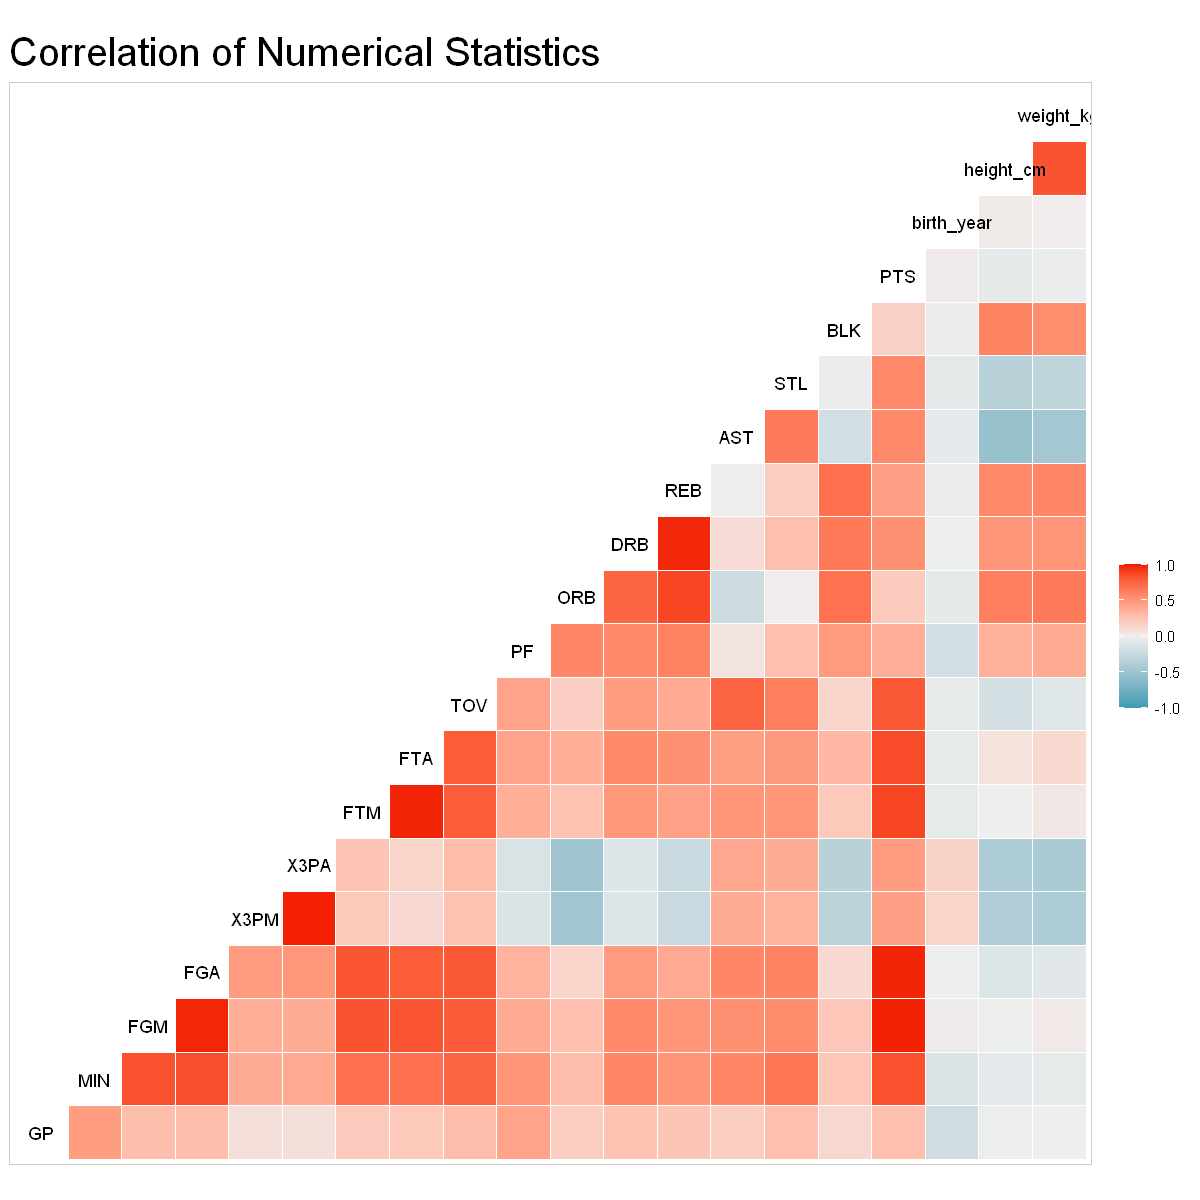

In [30]:
numbers <- NBA_data_filtered %>% select_if(is.numeric) 

# Drop draft_pick and draft_round columns that contain NA values. 
numbers_na <- numbers %>% select(which(colSums(is.na(.)) == 0))

corr_df <- ggcorr(numbers_na) + ggtitle('Correlation of Numerical Statistics') + theme(title = element_text(size=20))

corr_df



The correlation plot displays many potential relationships that we can explore in the future. 


### Data Wrangling and Visualizations

#### Research Question #1:

What has happened to the rate of 3-point shooting in the NBA over time?

In [31]:
# Make new data frame to alter for this plot 
df_threes <- NBA_data_filtered 
# Group dataframe by season and average ration of 3 pointers attempted out of total shots attempted
df_3_ratio <- df_threes %>% group_by(Season) %>% mutate(X3PM_FGM_ratio = mean(X3PA/FGA))
# Condense df
df_3_ratio <- df_3_ratio %>% distinct(Season, X3PM_FGM_ratio)

# Create new columns with the Stephen Curry MVP season rows to be highlighted as the only TRUE values. 
df_3_ratio$highlight <- FALSE
df_3_ratio$highlight[df_3_ratio$Season == '2014 - 2015' | df_3_ratio$Season == '2015 - 2016'] <- TRUE

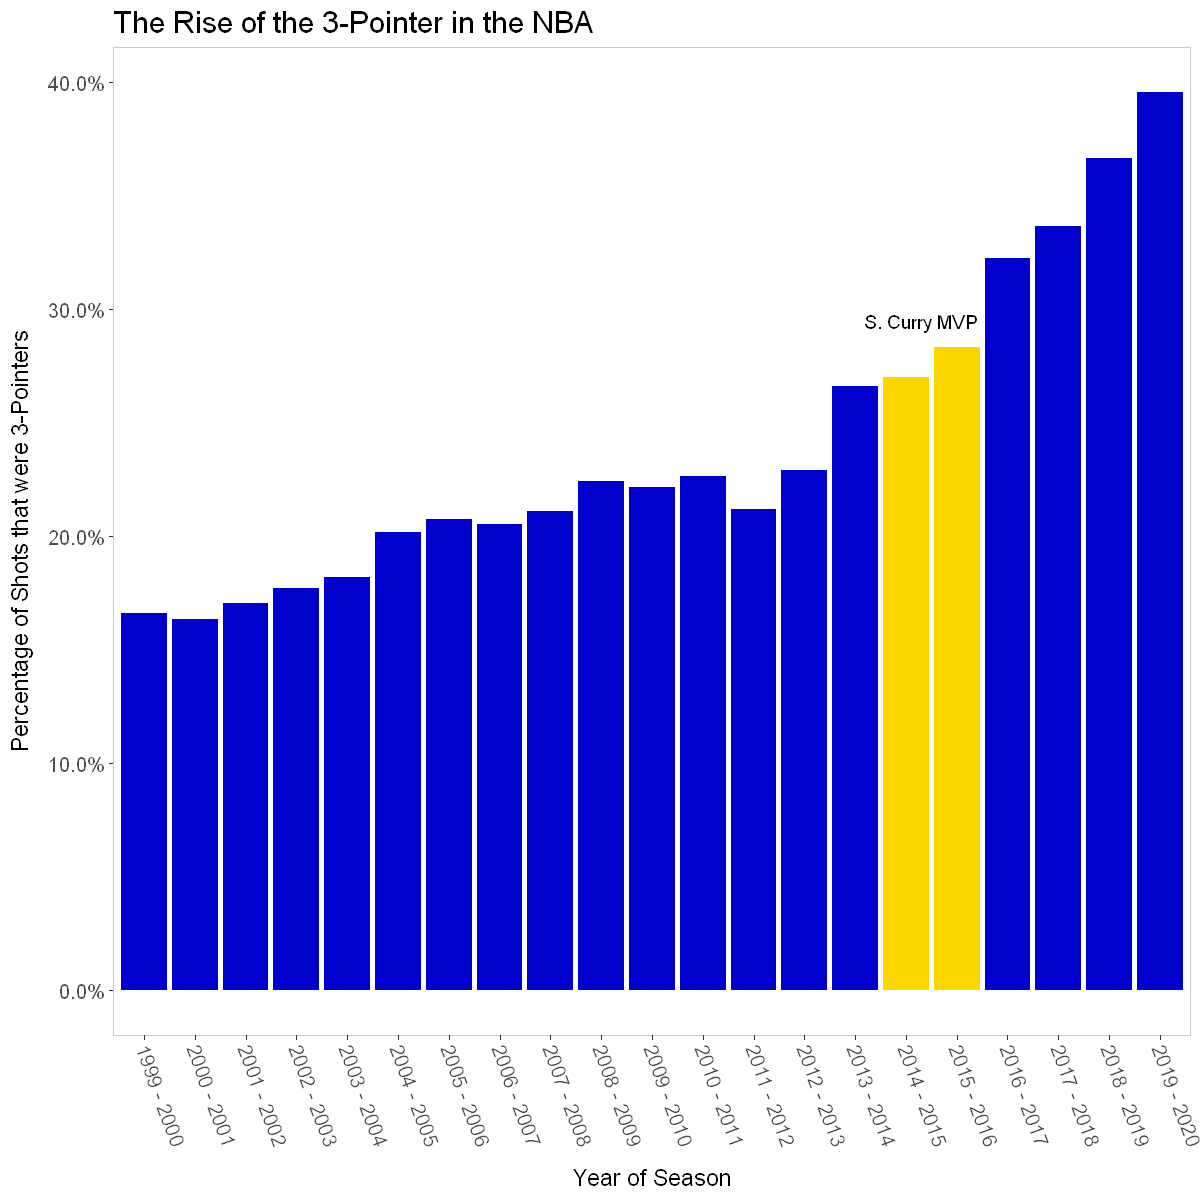

In [32]:
# Set size of plot
options(repr.plot.width=10, repr.plot.height=10)
# Create plot with label of highlighted bars. 
ggplot(df_3_ratio) + aes(x= Season, y= X3PM_FGM_ratio, fill= highlight) + 
    geom_col(show.legend=FALSE) +  
    theme(axis.text.x = element_text(angle=-70, hjust=-0.2, size=12), axis.text.y= element_text(size = 12),
     panel.grid.major = element_blank(), plot.title= element_text(size=18), axis.title.x= element_text(size=14),
     axis.title.y= element_text(size=14), legend.title= element_text(size=14), legend.text = element_text(size = 12))+
    labs(x= "Year of Season", y="Percentage of Shots that were 3-Pointers", title= "The Rise of the 3-Pointer in the NBA") + 
    scale_y_continuous(labels = scales::percent) + scale_fill_manual(values= c("blue3", "gold"))+
    annotate('text', label = 'S. Curry MVP', x = 16.3, y = 0.295, size=4)

We can see from the plot above that the rate of 3-point shot attempts has been steadily increasing over time. Part of this increase has been contributed to the increase in the use of [analytics in the NBA](https://www.theatlantic.com/entertainment/archive/2015/06/nba-data-analytics/396776/), but there is also evidence that the influence of a specific player has played a role. Stephen Curry of the Golden State Warriors is known as the most prolific 3-point shooter of all time, and we can see from the graph that as his influence in the NBA grew, there was a jump in the percentage of 3 point shot attempts throughout the league. Stephen Curry first named an "All-Star" in the 2013-2014 season, and he was named the NBA's most valuable player in the next two seasons. Although there is a general upward trend with time, these three seasons are where we see the most dramatic increases in 3-point attempts. Perhaps this is partially due to the popularity and success of Stephen Curry and his 3-point loving Golden State Warriors (that is why the plot is made in the Warriors team colors).


#### Research Question #2: 

The NBA is popular in the United States, but they have been making efforts to become a worldwide league and spread the brand, and the game of basketball around the world. 

Have the NBA's efforts to globalize been successful? 

##### Note: 
For this plot, we removed the 2011-2012 and the 2019-2020 seasons. These were both shortened seasons (2011-2012 due to the NBA lockout, and 2019-2020 due to the coronavirus pandemic). Our data is filtered by the number of players that played in more than 60 games in each season, and in a shortened season (less than the regular 82 games), there are less players that make it to the 60-game benchmark. To accurately compare from year to year, we decided to remove the years with shortened seasons from this plot.


In [33]:
 
# Make new data frame with two seasons that had a shortened amount of games removed (NBA lockout year and pandemic year). 
df_country <- NBA_data_filtered %>% filter(NBA_data_filtered$Season != '2011 - 2012' & NBA_data_filtered$Season != '2019 - 2020')
# alter nationality column to be either 'United States' or 'International'
df_int <- df_country %>% mutate(nationality = ifelse(nationality != 'United States', 'International', nationality))
# Find out how many international and US players there are in each season. 
df_int_count <- df_int %>% group_by(Season) %>% count(nationality)

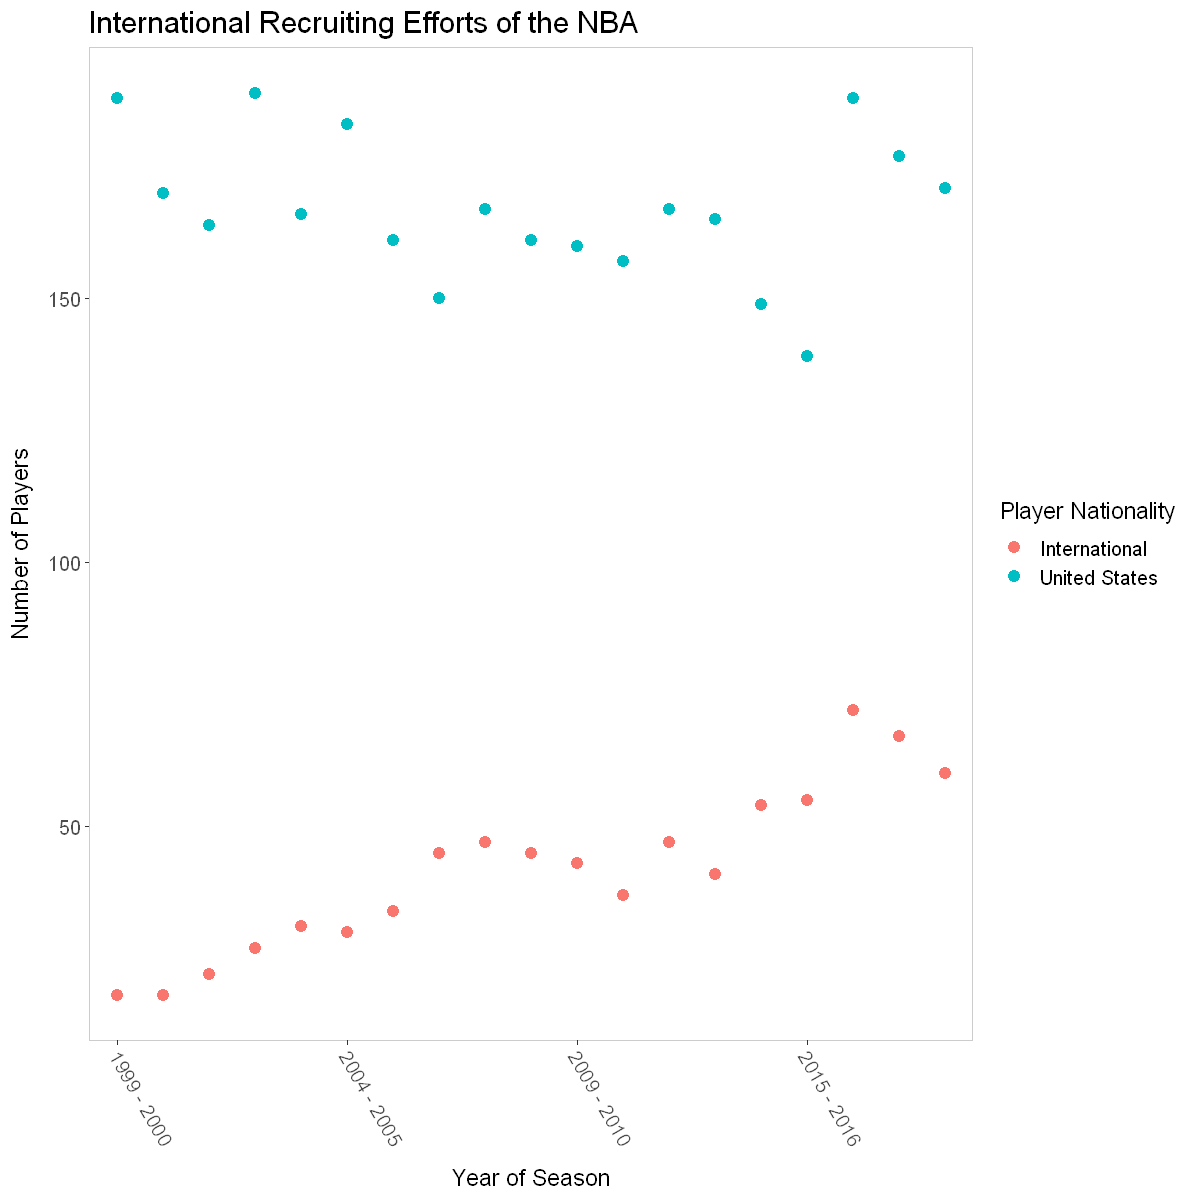

In [34]:
# Set variables for making the ticks marks on the x axis once every 10 years. 
end <- length(df_int_count$Season)
var <- df_int_count$Season
interval <- var[seq(1, end, by=10)]

# Create the plot
ggplot(df_int_count) + aes(x= Season, y= n, color= nationality) + geom_point(size=3) +
scale_x_discrete(breaks= interval, labels= interval) + 
theme(axis.text.x = element_text(angle=-60, hjust=-0.1, size=12), axis.text.y= element_text(size = 12),
     panel.grid.major = element_blank(), plot.title= element_text(size=18), axis.title.x= element_text(size=14),
     axis.title.y= element_text(size=14), legend.title= element_text(size=14), legend.text = element_text(size = 12))+
labs(x= "Year of Season", y="Number of Players", title= "International Recruiting Efforts of the NBA", color= "Player Nationality")



We can see from this plot that although there are many more American players than international players in the NBA, the number of international players is steadily increasing. It does appear that the NBA's efforts to globalize are starting to pay off. 



#### Follow-up Question #1 (Not Answered in this Project):

With the increase in the number of international players, perhaps there are more international fans of the NBA. To determine if this is the case, we could pose the question:

How have the NBA's international viewing ratings been affected by the increasing number of international players?

In order to answer this question, we would need the TV ratings data from multiple countries around the world to analyze NBA viewing rates in each country. 


#### Research Question #3:

How does age affect scoring ability of NBA players?

To determine the variation in a players' scoring ability with age, a new column was created by subtracting the `Season` by the `birth_year` for each player. The new column called `year` was also added. The data was then filtered and grouped by age to include only numeric columns and to represent the mean value for each player statistic for each age group.

In [35]:
year <- list()
age <- list()
for(i in 1:nrow(NBA_data_filtered)){
    current_year <- as.numeric(substring(NBA_data_filtered[i,2], 8,11))
    age[i] <- current_year - NBA_data_filtered$birth_year[i]
    year[i] <- current_year
}

NBA_data_temp <-add_column(NBA_data_filtered,age = as.numeric(age),.after=22)
NBA_data_temp <-add_column(NBA_data_temp,year = as.numeric(year),.after=1)

# Select only numerical columns and group by age and find mean of each stat
NBA_grouped_age <- subset(NBA_data_temp,select=c(2,7:24)) %>% group_by(age) %>% summarize(across(everything(), mean)) %>% mutate_at(vars(-age), funs(round(., 1)))
head(NBA_grouped_age)

`summarise()` ungrouping output (override with `.groups` argument)



age,year,GP,MIN,FGM,FGA,X3PM,X3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,2011.6,75.0,1836.6,277.8,635.0,47.2,143.9,139.4,193.3,115.0,160.0,90.3,233.9,324.2,129.8,51.4,48.6,742.2
21,2011.2,75.7,1945.2,308.3,679.2,47.9,142.0,155.0,212.7,124.0,174.6,102.1,259.7,361.8,162.1,63.9,48.5,819.4
22,2011.0,74.8,1934.0,316.4,688.8,49.2,142.5,158.4,213.8,120.2,172.2,99.3,257.7,357.0,166.5,61.6,45.4,840.3
23,2010.2,75.0,1993.4,328.0,714.7,52.2,150.1,164.9,220.9,123.8,172.6,99.6,268.2,367.8,186.9,66.1,43.0,873.1
24,2010.1,75.5,1976.8,324.8,704.5,55.4,156.4,161.3,214.6,117.6,171.0,95.3,256.8,352.2,178.8,65.1,41.9,866.3
25,2010.3,75.0,2031.4,335.8,727.7,60.9,169.9,169.2,222.7,118.7,171.7,96.9,266.0,362.9,182.6,65.5,42.1,901.7


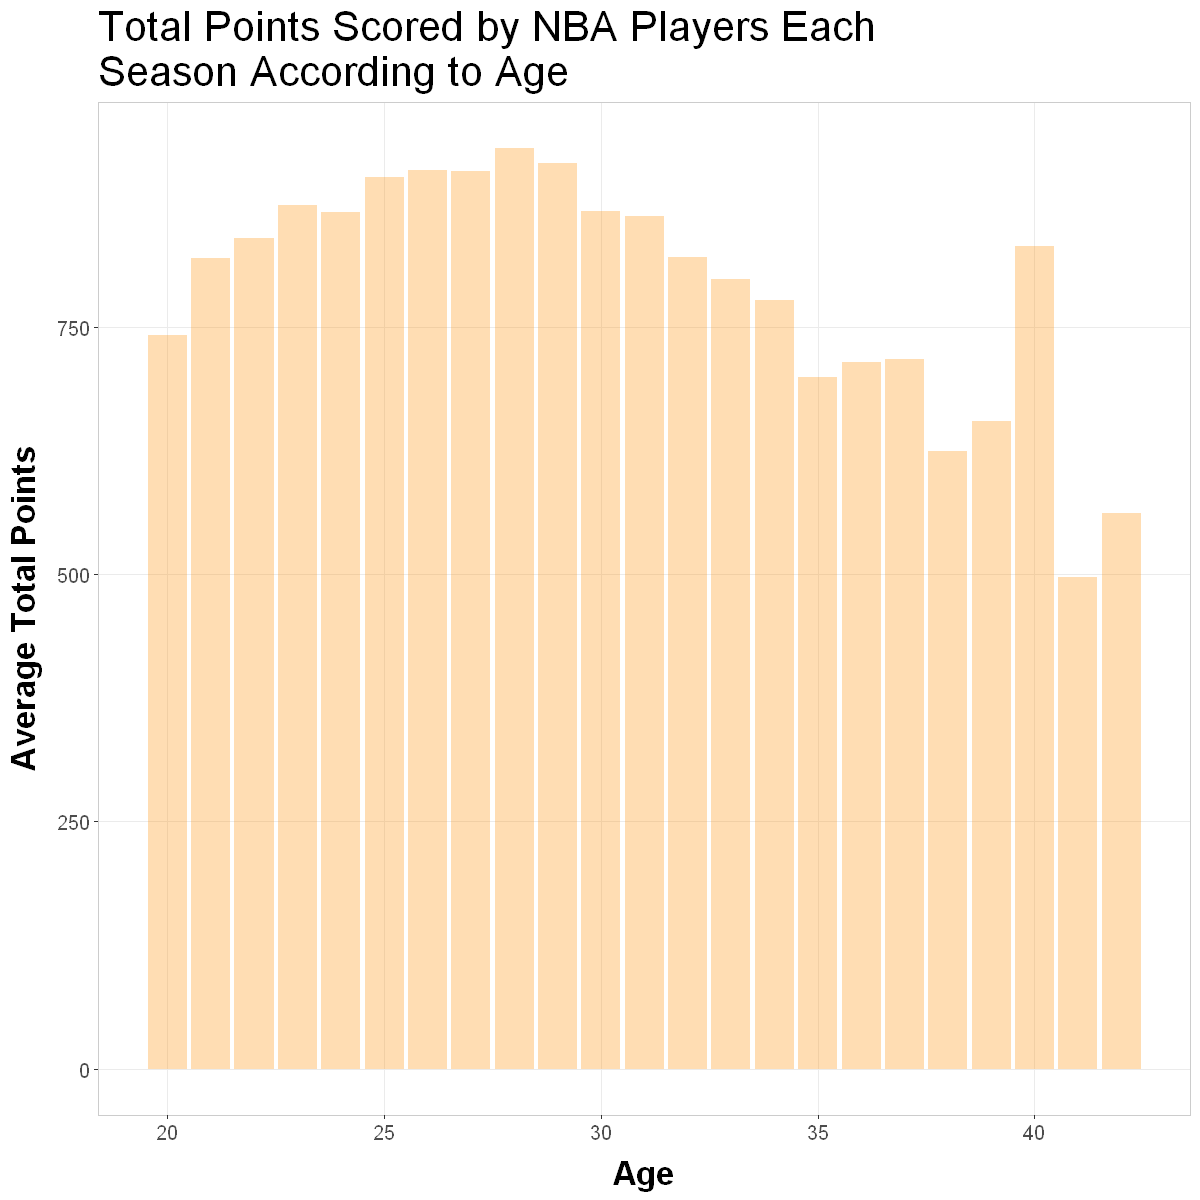

In [36]:
#Create plot
ggplot(NBA_grouped_age) + aes(x = age, y = PTS) + 
geom_col(fill = 'darkorange',alpha = 0.3) +
scale_x_continuous(name="Age") +
scale_y_continuous(name="Average Total Points") +
ggtitle('Total Points Scored by NBA Players Each\nSeason According to Age')+
theme(axis.text=element_text(size=12),
        axis.title=element_text(size=20,face="bold"),
        plot.title = element_text(size=25),
        legend.position = "none")

By modeling the total points scored based on the age of the player, we can observe that most players score an average of 750 points in their first season in the NBA, increasing to a peak of 900 points per season by the age of 25. At this point, a player's scoring rate plateaus until they turn 29, then it starts rapidly decreasing at a rate of 25 points per season each year. The data for players over 35 years old is highly variable as only a limited number of players remain in the NBA until the age of 35 and continue to play more than 60 games per season.

We wanted to dig deeper into the breakdown of the type of points that are scored in the NBA. 

#### Research Question # 4:

How are total points distributed by 2-pointers vs. 3-pointers in the NBA?


In [37]:
# Group by year and find mean of numerical stats
NBA_grouped_year <- subset(NBA_data_temp,select=c(2,7:24,29)) %>% group_by(year) %>% summarize(across(everything(), mean)) %>% mutate_at(vars(-year), funs(round(., 1)))
# Add column showing points scored from 3 pointers (multiply 3 pointers made by 2 points for each shot)
NBA_grouped_year <-add_column(NBA_grouped_year,X3PM_corrected = NBA_grouped_year$X3PM*3)
# Add column showing points scored from 2 pointers
NBA_grouped_year <-add_column(NBA_grouped_year,X2P_corrected = NBA_grouped_year$PTS - NBA_grouped_year$X3PM*3)

`summarise()` ungrouping output (override with `.groups` argument)



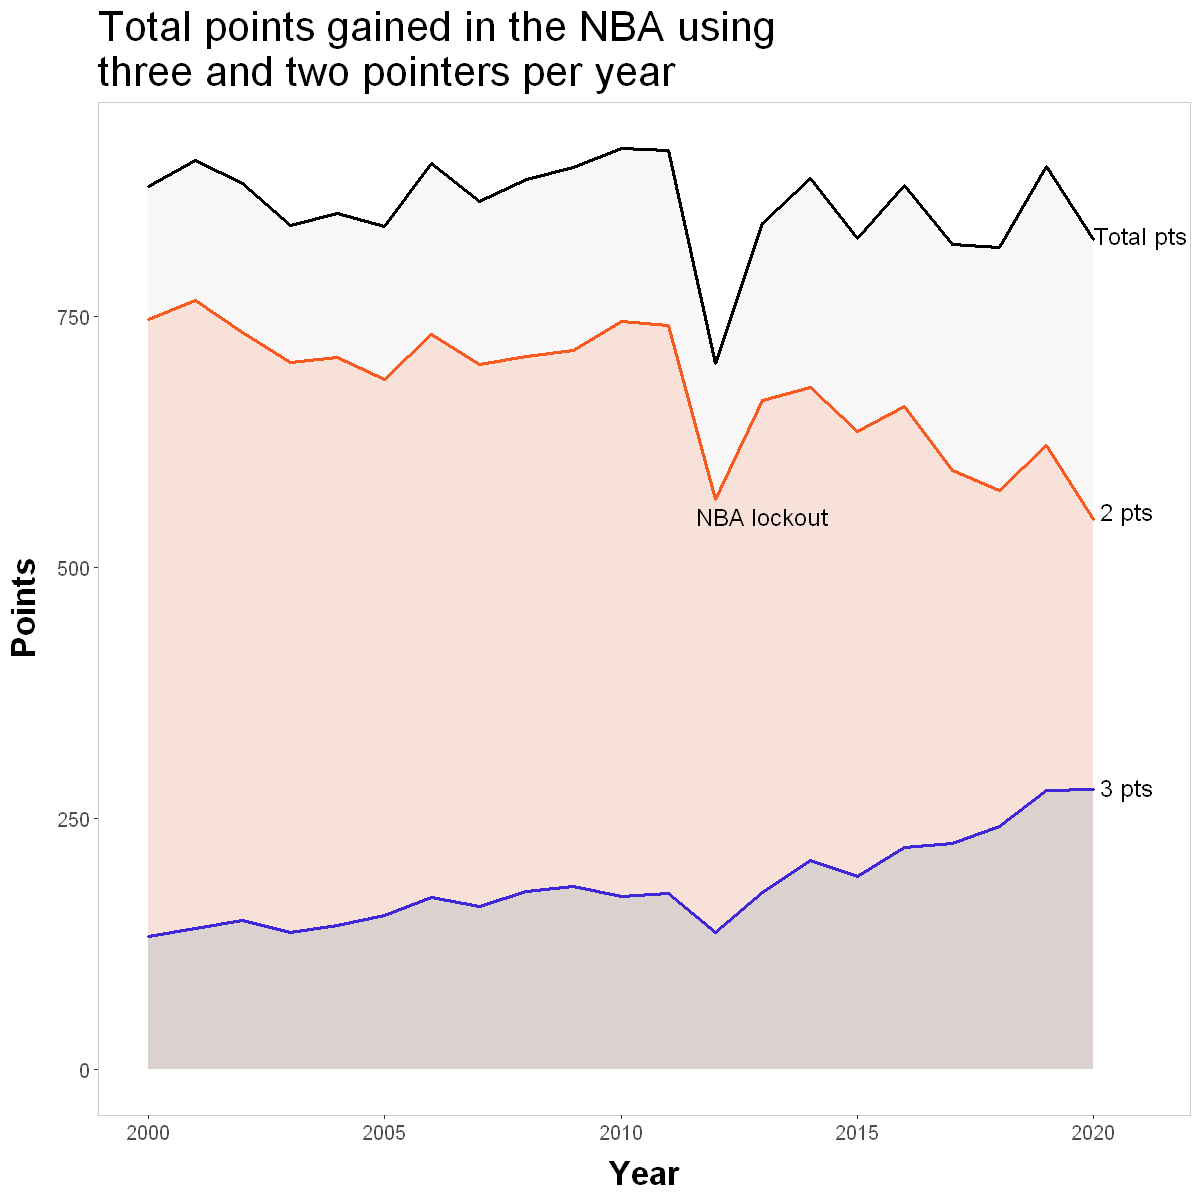

In [106]:
# Create plot

ggplot(NBA_grouped_year, aes(x = year)) + 
    geom_area(aes(y = X3PM_corrected), fill = 'lightblue', color ='blue', size = 1,alpha = 0.5)  +
    geom_area(aes(y = X2P_corrected), fill = 'orangered', color ='orangered', size = 1,alpha = 0.15)  +
    geom_area(aes(y = PTS), fill = 'lightgrey', color ='black', size = 1,alpha = 0.15)  +
    scale_x_continuous(name="Year") +
    scale_y_continuous(name="Points") +
    ggtitle('Total points gained in the NBA using\nthree and two pointers per year')+
    theme(axis.text=element_text(size=12),
        axis.title=element_text(size=20,face="bold"),
        plot.title = element_text(size=25),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        legend.position="bottom",legend.text = element_text(colour="blue", size=10, 
                                     face="bold")
)+
annotate('text', label = 'NBA lockout', x = 2013, y = 550, size=5)+
annotate('text', label = 'Total pts', x = 2021, y = 830, size=5) +
annotate('text', label = '2 pts', x = 2020.7, y = 555, size=5) +
annotate('text', label = '3 pts', x = 2020.7, y = 280, size=5)

When the data is grouped by year, the plot above displays the overall total points, the total points from 3 pointers and the total points from 2 pointers over time. What we observed is that from the years 2000-2020. The total number of points scored from 2 pointers is significantly larger than that from 3 pointers, with 2 pointers scoring 750 points and 3 pointers totaling 130 points each year. However, by the year 2020, the number of points from 3 pointers has increased to 280 points, while points from 2 pointers has decreased to 550 points. This change in the distribution of points is fairly consistent, suggesting that within the next 16 years, assuming the trend stays consistent that the number of points from 3 pointers could overtake the number of points scored from 2 pointers. 

##### Note: 
We also see a dip in total points in the 2011-2012 season due to the NBA lockout causing there to be 66 games instead of the regular 82 games played that season. 



Now we will look at this same points breakdown by age of players instead of year of the season. 


In [39]:
# Perform same data wrangling as done for the previous chart, except grouping by age instead of year. 
NBA_grouped_age <-add_column(NBA_grouped_age,X3PM_corrected = NBA_grouped_age$X3PM*3)
NBA_grouped_age <-add_column(NBA_grouped_age,X2P_corrected = NBA_grouped_age$PTS - NBA_grouped_age$X3PM*3)

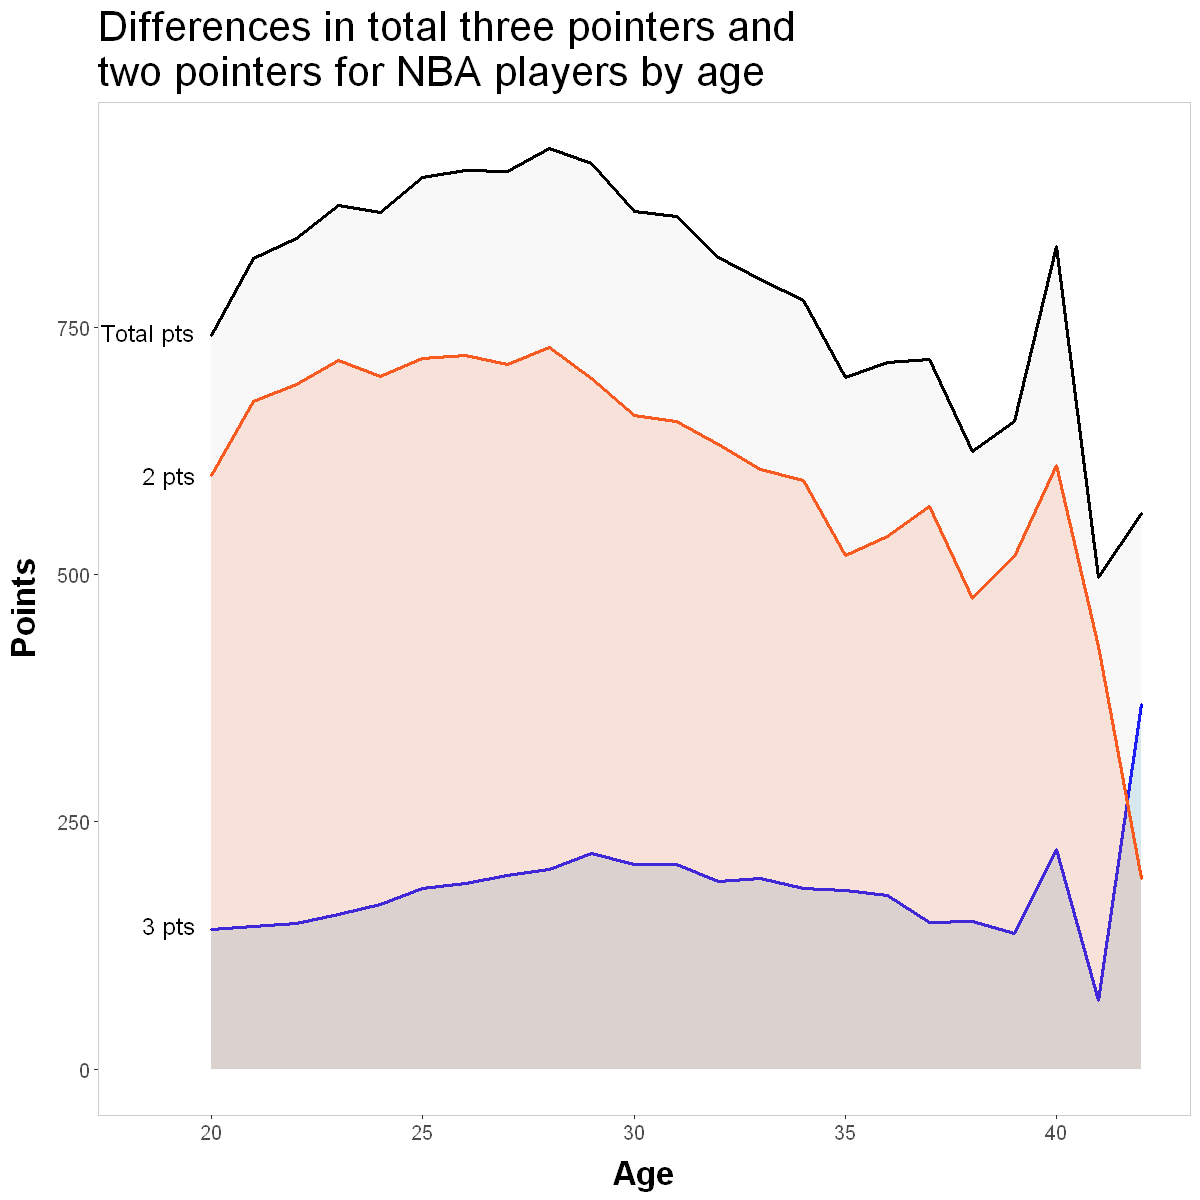

In [107]:
# Create plot of points breakdown (3 pointers vs. 2 pointers) by age

ggplot(NBA_grouped_age) + aes(x = age, y = PTS) + 
 geom_area(aes(y = X3PM_corrected), fill = 'lightblue', color ='blue', size = 1,alpha = 0.5)  +
    geom_area(aes(y = X2P_corrected), fill = 'orangered', color ='orangered', size = 1,alpha = 0.15)  +
    geom_area(aes(y = PTS), fill = 'lightgrey', color ='black', size = 1,alpha = 0.15)  +
    scale_x_continuous(name="Age") +
    scale_y_continuous(name="Points") +
    ggtitle('Differences in total three pointers and\ntwo pointers for NBA players by age')+
    theme(axis.text=element_text(size=12),
        axis.title=element_text(size=20,face="bold"),
        plot.title = element_text(size=25),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        legend.position="bottom",legend.text = element_text(colour="blue", size=10, 
                                     face="bold")
)+
annotate('text', label = 'Total pts', x = 18.5, y = 745, size=5) +
annotate('text', label = '2 pts', x = 19 , y = 600, size=5) +
annotate('text', label = '3 pts', x = 19 , y = 145, size=5)


As seen above, when we compared the distribution of points of two and three pointers made by players with their age, we observe that players quickly maximize their scoring ability for two pointer and plateau by the age of 23. In contrast, the players reach their maximum 3-point scoring rate when they're 29, and the rate decreases significantly more slowly than that of two pointers. This is expected as 3 pointers require technical ability that would develop over time while 2 pointers require more speed and agility. Therefore, as 3 pointers are increasingly becoming the dominate method for scoring points, it would suggest a change in demographic or strategy within the league, allowing for more older players to have a significant impact on scoring.


#### Follow-Up Question #2 (Not Answered in this Project):

Why does the 3-point scoring rate increase sharply at ages 40 and 42?

To answer this question, we would need to determine how many players there are at those specific ages and determine who those individual players are. It is possible that if there are very few players at those ages, a single player who makes a large amount of three pointers would skew the data as seen above. 


### Summary

We have learned from an exploratory analysis of this NBA data that the three pointer is becoming more important. If this trend continues, it may allow older players to continue to score at high rates as they age. We also learned that the NBA is seeing an increase in the number of international players, which suggests that the globalization efforts of the NBA are proving effective.   